## 1. Import required Libraries

In [ ]:
!pip install cleanlab

import glob
import os
import re
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from cleanlab.filter import find_label_issues
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 12.6 MB/s eta 0:00:00
Mounted at /content/drive


## 2. Loading the Data

In [ ]:
'''
  This section will load 625 images of each stage from  into their
  corresponding stages. It will count how many have each type of error to
  be returned later on as well as ensuring that every image loaded into
  the stages is in the right format and is a valid image file.
'''

# Setting variables
folder_path = '/content/drive/MyDrive/Data_Ai/AssignmentTwo/Images'
inv_format_count = 0
inv_size_count = 0
fail_load_count = 0
img_size = [150, 150]

# Function to check if an image is valid
def is_valid(filepath):
  global inv_format_count, inv_size_count, fail_load_count
  try:
    with Image.open(filepath) as img:
      if img.format not in ['PNG', 'JPEG', 'JPG']:
        inv_format_count += 1
        return False
      img.verify()
      if img.width > img_size[0] or img.height > img_size[1]:
        inv_size_count += 1
      return True
  except:
    fail_load_count += 1
    return False

# Function to get the first amount of valid images and save some for
# unseen data to be used later
def get_first_n_valid_images_and_remainder(folder_path, stage):
    n = 625
    valid_images = []
    remainder_images = []
    stage_path = os.path.join(folder_path, stage)
    for img in glob.glob(stage_path + "/*.*"):
        if is_valid(img):
            if len(valid_images) < n:
                valid_images.append(img)
            elif len(remainder_images) < 5:
                remainder_images.append(img)
    return valid_images, remainder_images

# Retrieve first 625 valid images from each stage and get unseen
# data to be used later
stage_1, stage_1_unseen = get_first_n_valid_images_and_remainder(
    folder_path, "Stage1")
stage_2, stage_2_unseen = get_first_n_valid_images_and_remainder(
    folder_path, "Stage2")
stage_3, stage_3_unseen = get_first_n_valid_images_and_remainder(
    folder_path, "Stage3")
stage_4, stage_4_unseen = get_first_n_valid_images_and_remainder(
    folder_path, "Stage4")
stage_5, stage_5_unseen = get_first_n_valid_images_and_remainder(
    folder_path, "Stage5")
stage_6, stage_6_unseen = get_first_n_valid_images_and_remainder(
    folder_path, "Stage6")
stage_7, stage_7_unseen = get_first_n_valid_images_and_remainder(
    folder_path, "Stage7")
stage_8, stage_8_unseen = get_first_n_valid_images_and_remainder(
    folder_path, "Stage8")

# Combine all leftover images into a single list
unseen_images = (
    stage_1_unseen + stage_2_unseen + stage_3_unseen + stage_4_unseen +
    stage_5_unseen + stage_6_unseen + stage_7_unseen + stage_8_unseen
)


In [ ]:
'''
  Using the file now in each corresponding stage array, it will load the
  images into data and labels so that each has the same index in labels
  and data. They will be added to data with the appropriate image size.
  Finally it outputs the amount of images added to data as well as how
  many of each error was found during the loading process.
'''

# Loop through each stage, labelling and adding them to data and labels
data = []
labels = []

for img in stage_1:
  image = tf.keras.preprocessing.image.load_img(img, color_mode='rgb',
                                                target_size=img_size)
  data.append(np.array(image))
  labels.append(1)

for img in stage_2:
  image = tf.keras.preprocessing.image.load_img(img, color_mode='rgb',
                                                target_size=img_size)
  data.append(np.array(image))
  labels.append(2)

for img in stage_3:
  image = tf.keras.preprocessing.image.load_img(img, color_mode='rgb',
                                                target_size=img_size)
  data.append(np.array(image))
  labels.append(3)

for img in stage_4:
  image = tf.keras.preprocessing.image.load_img(img, color_mode='rgb',
                                                target_size=img_size)
  data.append(np.array(image))
  labels.append(4)

for img in stage_5:
  image = tf.keras.preprocessing.image.load_img(img, color_mode='rgb',
                                                target_size=img_size)
  data.append(np.array(image))
  labels.append(5)

for img in stage_6:
  image = tf.keras.preprocessing.image.load_img(img, color_mode='rgb',
                                                target_size=img_size)
  data.append(np.array(image))
  labels.append(6)

for img in stage_7:
  image = tf.keras.preprocessing.image.load_img(img, color_mode='rgb',
                                                target_size=img_size)
  data.append(np.array(image))
  labels.append(7)

for img in stage_8:
  image = tf.keras.preprocessing.image.load_img(img, color_mode='rgb',
                                                target_size=img_size)
  data.append(np.array(image))
  labels.append(8)

# Print end results of the loading of the data
# Returns the errors found within the data
print(f"Total Images: {len(data)}")
print(f"Total Images with Invalid Format {inv_format_count}")
print(f"Total Images with Invalid Size {inv_size_count}")
print(f"Total Images which failed to load {fail_load_count}")

# Deleting unnecessary data to free up RAM
del stage_1
del stage_2
del stage_3
del stage_4
del stage_5
del stage_6
del stage_7
del stage_8


Total Images: 5000
Total Images with Invalid Format 144
Total Images with Invalid Size 1089
Total Images which failed to load 106


## 3. Data Labelling Errors

Number of uncertain predictions: 34
Labels passed to Cleanlab: [3 2 6 2 3 2 2 1 3 4 3 4 6 4 3 1 1 4 2 5 6 3 2 6 3 3 6 3 3 4 2 6 5 4] 

Number of label issues found: 16
Number of potential label issues: 16
Indices of potential label issues: [29 30 32  3 31 27  2 21 16 28 14 10 17 25 11 33] 

Error analysis: {'mislabel': 0, 'uncertain': 16}


/usr/local/lib/python3.10/dist-packages/cleanlab/filter.py:904: UserWarning: May not flag all label issues in class: 0, it has too few examples (see `min_examples_per_class` argument)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cleanlab/filter.py:904: UserWarning: May not flag all label issues in class: 7, it has too few examples (see `min_examples_per_class` argument)
  warnings.warn(


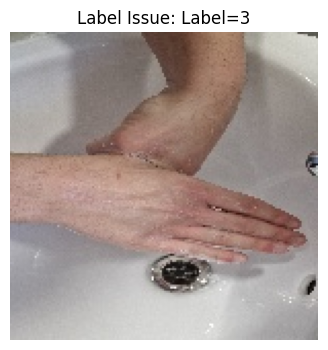

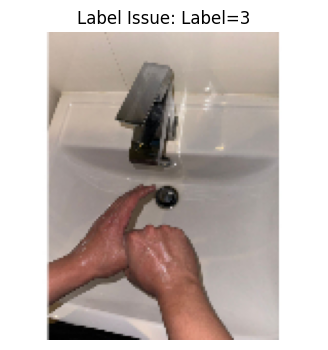

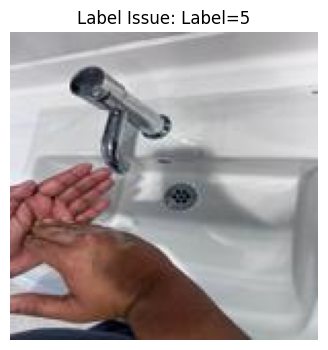

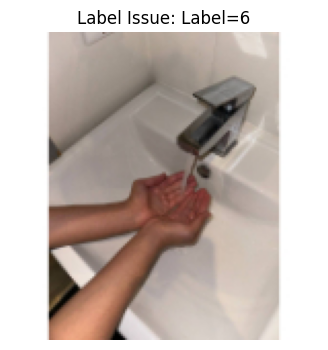

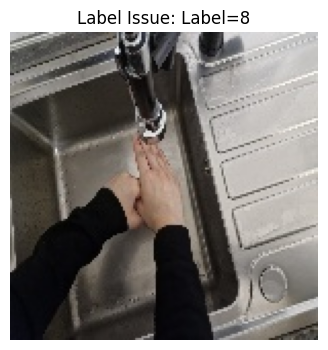

In [ ]:
'''
  This section finds and removes any label errors in the data. It first
  prepares the data by normalising it and flattening it. It then encodes
  the labels and splits the data into training and validation. The data is
  then scaled and the model is trained on the training data. It then
  gets the predicition probabibilies from the model and anything with a
  lower confidence than 80% will be passed into cleanlab's
  "find_label_issues" which in turn returns all potential label issues.
  These data issues are then droppped from data and labels before moving
  forward.
'''

# Normalize and flatten image data
data = np.array(data)
normalised_data = data / 255.0
flat_data = normalised_data.reshape(data.shape[0], -1)

# Encode labels so that they are usable by the model
label_encoder = preprocessing.LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data
train_data, val_data, train_labels, val_labels = train_test_split(
    flat_data, encoded_labels, test_size=0.2, random_state=42)

# Scale the train data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)

# Creating the model to be used for label errors
# Uses a high max_iteration so it wont be reached
# which means it lets the model do the best it can
label_error_model = LogisticRegression(max_iter=1000, random_state=42)
label_error_model.fit(train_data, train_labels)

# Predict probabilities
pred_probs = label_error_model.predict_proba(train_data)

# Set a threshold for prediction confidence
confidence_threshold = 0.6

# Identify uncertain predictions
uncertain_predictions = []
for i, prob in enumerate(pred_probs):
    max_prob = np.max(prob)
    if max_prob < confidence_threshold:
        uncertain_predictions.append(i)

# Print results found
print(f"Number of uncertain predictions: {len(uncertain_predictions)}")
print(f"Labels passed to Cleanlab: {train_labels[uncertain_predictions]} \n")

# Using cleanlab to find the label issues
label_issues = find_label_issues(
    train_labels[uncertain_predictions],
    pred_probs[uncertain_predictions],
    return_indices_ranked_by='self_confidence',
    verbose=True,)

# Print results found
print(f"Number of potential label issues: {len(label_issues)}")
print("Indices of potential label issues:", label_issues, "\n")

# Analysing the label errors
error_analysis = {'mislabel': 0, 'uncertain': 0}
for index in label_issues:
  true_label = train_labels[uncertain_predictions[index]]
  predicted_label = np.argmax(pred_probs[uncertain_predictions[index]])
  if true_label == predicted_label:
    error_analysis['mislabel'] += 1
  else:
    error_analysis['uncertain'] += 1

print(f"Error analysis: {error_analysis}")

# Show an example of the label errors
for index in label_issues[:5]:
    plt.figure(figsize=(4, 4))
    plt.imshow(data[uncertain_predictions[index]])
    plt.axis('off')
    plt.title(f"Label Issue: Label={train_labels[index]+1}")
    plt.show()

# Remove label errors
filtered_data = np.delete(train_data, label_issues, axis=0)
filtered_labels = np.delete(train_labels, label_issues, axis=0)

# Clearing ram space
del train_data
del val_data
del train_labels
del val_labels
del label_error_model
del pred_probs
del label_issues
del uncertain_predictions
del label_encoder
del encoded_labels
del scaler

In [ ]:
# Returning the total amount of remaining images per stage

# Count the remaining images for each stage
images_per_stage = {stage: 0 for stage in range(1, 9)}

# Iterate through the filtered data and labels
for label in filtered_labels:
    images_per_stage[label+1] += 1

# Print Results
for stage, count in images_per_stage.items():
    print(f"Stage {stage}: {count}")

Stage 1: 483
Stage 2: 495
Stage 3: 503
Stage 4: 512
Stage 5: 498
Stage 6: 494
Stage 7: 509
Stage 8: 490


## Label errors:

<ol>
  <li>Explain what kind of errors you found in the dataset.</li>
  <li>List the total number of images left in each class/stage after the label error handling</li>
</ol>

<br>

<ol>
  <li>Stage 1: <<Number of images>></li>
  <li>Stage 2: <<Number of images>></li>
  <li>Stage 3: <<Number of images>></li>
  <li>Stage 4: <<Number of images>></li>
  <li>Stage 5: <<Number of images>></li>
  <li>Stage 6: <<Number of images>></li>
  <li>Stage 7: <<Number of images>></li>
  <li>Stage 8: <<Number of images>></li>
</ol>

## 4. Pre-process the Dataset

In [ ]:
# Using filtered data which does not include labelling errors
# Data has already been flattened, normalised and resized.

# Storing variables
final_data = np.array(filtered_data)
final_labels = np.array(filtered_labels)

# Clearing space in RAM ready for final part
del filtered_data
del filtered_labels
del data
del labels

## 5. Split the data
<br>

Split the data into training, validation and testing dataset using Startification, ensuring equal class distribution.

Choose appropriate values of training, validation and testing datasets.

Display total number of images in each dataset split.

In [ ]:
# Split the data with an appropriate ratio for the data size.
# A 30-70 split balances needing sufficient training data while
# also making sure that there is enough test data.
x_train, x_test, y_train, y_test = train_test_split(
    final_data, final_labels, test_size=0.3, random_state=42)

## 6. Model Implementation

In [ ]:
# Convert to one-hot encoding
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)

In [ ]:
'''
  This section defines the optimised CNN Model as well as preparing
  augemented data for improved training later. These optimisations
  include; more layers and filters, batch normalisation to improve
  training speed and dropout to minimise overfitting. The model is
  the compiled and the architecture is displayed.
'''
# Reshaping the data to work with the model
x_train = x_train.reshape(-1, 150, 150, 3)
x_test = x_test.reshape(-1, 150, 150, 3)

# Data Augementation so that it can be trained more efficiently
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Fit data generator to my training data
datagen.fit(x_train)

# Defining an optimised CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display architecture for checking
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 3,054,216 (11.65 MB)

 Trainable params: 3,052,872 (11.65 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [ ]:
# Train the model using the data
# Using a small batch size to reduce impact on the RAM
# High amount of epochs to give the model time to converge
model.fit(x_train, y_train, batch_size=32, epochs=30,
          validation_data=(x_test, y_test))

# Evaluate the model after using training data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.1361 - loss: 3.0750 - val_accuracy: 0.1028 - val_loss: 3.7063
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.1761 - loss: 2.5532 - val_accuracy: 0.1446 - val_loss: 2.7370
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1818 - loss: 2.3562 - val_accuracy: 0.1329 - val_loss: 2.7446
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1791 - loss: 2.3751 - val_accuracy: 0.1246 - val_loss: 2.5194
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.1752 - loss: 2.2461 - val_accuracy: 0.1346 - val_loss: 2.3529
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2161 - loss: 2.0963 - val_accuracy: 0.1605 - val_loss: 2.2755
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2328 - loss: 2.0357 - val_accuracy: 0.1622 - val_loss: 2.2787
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2380 - loss: 1.9983 - val_accuracy: 0.1990 

In [ ]:
# Train the model on the augemented training data
# 50 Epochs to give the model more time to converge
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=50, validation_data=(x_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 32s 254ms/step - accuracy: 0.2751 - loss: 2.0315 - val_accuracy: 0.3896 - val_loss: 1.6916
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - accuracy: 0.2846 - loss: 1.9048 - val_accuracy: 0.3411 - val_loss: 1.7827
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.2829 - loss: 1.8956 - val_accuracy: 0.3746 - val_loss: 1.7024
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.3296 - loss: 1.7978 - val_accuracy: 0.3905 - val_loss: 1.6997
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.3176 - loss: 1.8110 - val_accuracy: 0.3972 - val_loss: 1.6872
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.3389 - loss: 1.7882 - val_accuracy: 0.3913 - val_loss: 1.6538
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.3366 - loss: 1.7631 - val_accuracy: 0.3395 - val_loss: 1.8496
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.3564 - loss: 1.7356 - val_accuracy: 0.405

## 7. Evaluate the Model

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5254 - loss: 1.3302
Test accuracy: 0.50
Test loss: 1.35


### Training Curves

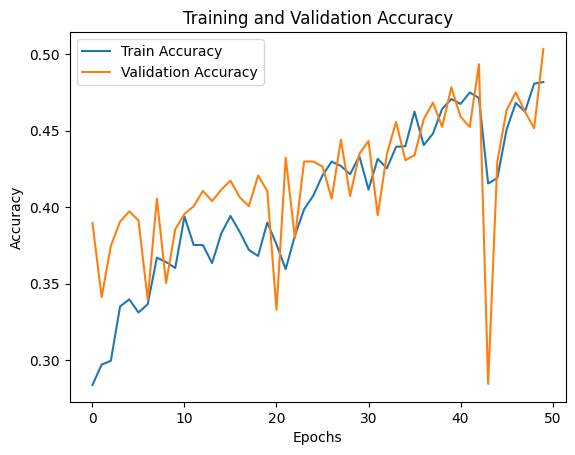

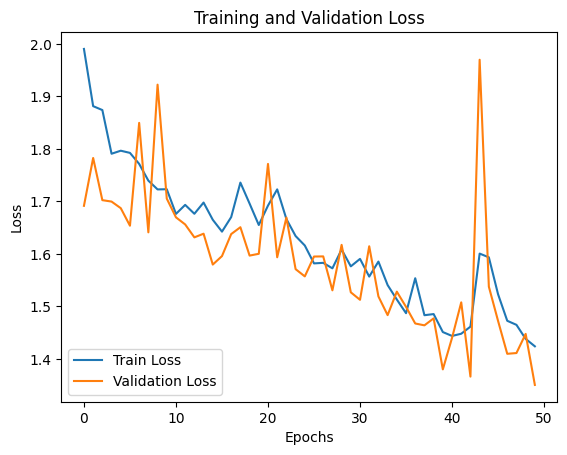

In [ ]:
'''
  This section will plot the training and validation accuracy and loss
  for the model onto graphs so that the models training curve can be
  viewed.
'''

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### Make Inference
For some unseen data, make predictions using the trained model.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Total Images: 40
Total Correct Predictions: 5
Total Incorrect Predictions: 35 

Misclassified Examples


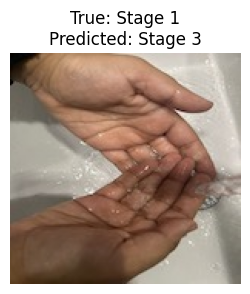

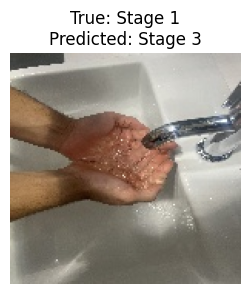

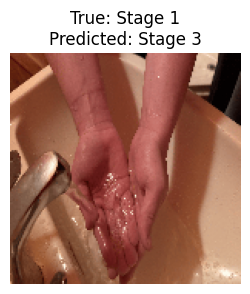

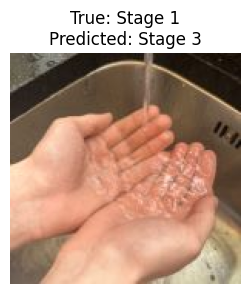

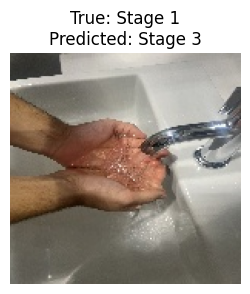


Classified Examples


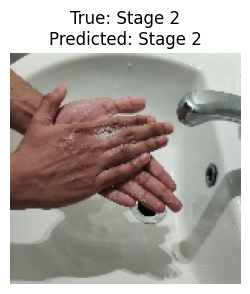

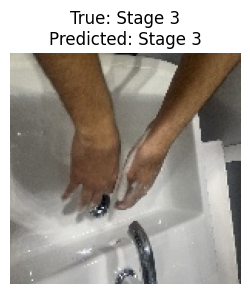

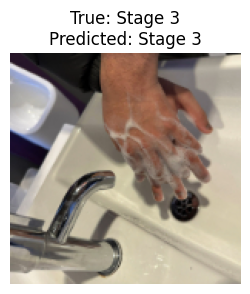

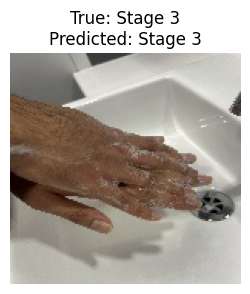

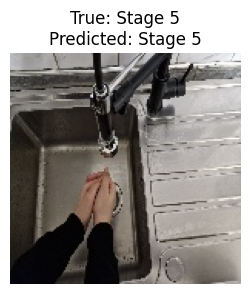

In [ ]:
'''
  This section gets the unseen data from at the start of the code and loads
  them into their appropriate variables. This unseen data is then predicted
  by the model and the results are displayed. It shows an example of the
  prediction per stage and then shows the first 5 missclassified examples.
'''

# Function to load the images
def load_images(image_paths, img_size=(150, 150)):
    images = []
    for img_path in image_paths:
        image = tf.keras.preprocessing.image.load_img(
            img_path, target_size=img_size, color_mode='rgb')
        images.append(np.array(image))
    return np.array(images)

# Load unseen data and normalise
unseen_data = load_images(unseen_images)
unseen_data = unseen_data / 255.0

# Storing the labels for the data
unseen_labels = (
    [1] * len(stage_1_unseen) +
    [2] * len(stage_2_unseen) +
    [3] * len(stage_3_unseen) +
    [4] * len(stage_4_unseen) +
    [5] * len(stage_5_unseen) +
    [6] * len(stage_6_unseen) +
    [7] * len(stage_7_unseen) +
    [8] * len(stage_8_unseen)
)

# Making the prediction on the unseen data
predictions = model.predict(unseen_data)
predicted_classes = np.argmax(predictions, axis=1)

# Displaying examples
unseen_labels_np = np.array(unseen_labels)
misclassified = np.where(unseen_labels_np != predicted_classes + 1)[0]
classified = np.where(unseen_labels_np == predicted_classes + 1)[0]

print(f"Total Images: {len(unseen_data)}")
print(f"Total Correct Predictions: {len(classified)}")
print(f"Total Incorrect Predictions: {len(misclassified)} \n")

print(f"Misclassified Examples")
for i in misclassified[:5]:
    plt.figure(figsize=(3, 3))
    plt.imshow(unseen_data[i])
    plt.axis('off')
    plt.title(f"True: Stage {unseen_labels_np[i]}\n"
              f"Predicted: Stage {predicted_classes[i] + 1}")
    plt.show()

print(f"\nClassified Examples")
for i in classified[:5]:
    plt.figure(figsize=(3, 3))
    plt.imshow(unseen_data[i])
    plt.axis('off')
    plt.title(f"True: Stage {unseen_labels_np[i]}\n"
              f"Predicted: Stage {predicted_classes[i] + 1}")
    plt.show()